# Object Detection

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Face Detection using Cascade Classifier using OpenCV - Python

In [53]:
# Loading  pre-trained  Haar Cascade Classifiers
import cv2.data
Face = cv2.CascadeClassifier('./Haar_Cascade/haarcascade_frontalface_default.xml')
eye = cv2.CascadeClassifier(cv2.data.haarcascades + './HaarCascade/haarcascade_eye.xml')

In [54]:
# Check if the cascade classifiers are loaded correctly
if Face.empty():
    print("Error: Could not load face cascade classifier.")
else:
    print("Face cascade loaded successfully.")

if eye.empty():
    print("Error: Could not load eye cascade classifier.")
else:
    print("Eye cascade loaded successfully.")

Face cascade loaded successfully.
Error: Could not load eye cascade classifier.


### -- Creating Function to Detect Faces & Eyes

In [55]:
def adjusted_detect_face(image):
    face_image = image.copy()
    face_rect = Face.detectMultiScale(face_image, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in face_rect:
        cv2.rectangle(face_image, (x, y), (x + w, y + h), (0, 0, 255), 10)

    return face_image


def adjusted_detect_eye(image):
    eye_image = image.copy()
    eye_rect = eye.detectMultiScale(eye_image, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in eye_rect:
        cv2.rectangle(eye_image, (x, y), (x + w, y + h), (0, 0, 255), 10)

    return eye_image

### -- Loading Image

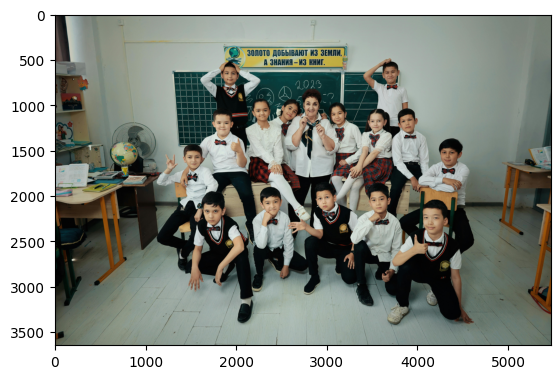

In [56]:
image = cv2.imread('./data/Face_detect.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### --Detecting Faces and Eyes

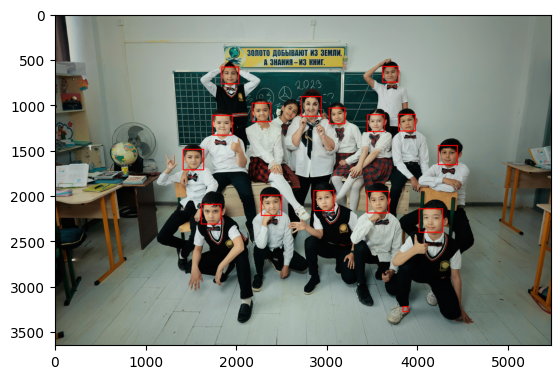

True

In [57]:
face = adjusted_detect_face(image)
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('face.jpg', face)

In [ ]:
face = adjusted_detect_eye(image)
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('face.jpg', face)

### CAscade With Video 

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    face = adjusted_detect_face(frame)

    cv2.imshow('Face Detection', face)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()